## Connecting to the  Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### This dataset gives a number of variables along with a target condition of having or not having heart disease. It contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient.

# Let us perform an EDA (Exploratory Data Analysis) first on the dataset to understand the data better.

## Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

## Importing Datasets

We will be using the Cleveland Dataset (processed.cleveland.data)

In [ ]:
Cleveland_Original_dataset = pd.read_csv('/content/drive/MyDrive/Cas_Study_2_Group_2/Heart_desease_data_set/heart_disease/processed.cleveland.data', header= None)

### Copy of the dataset for our work

In [ ]:
Cleveland_dataset= Cleveland_Original_dataset.copy()
Cleveland_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Here, we got the dataset imported as Pandas DataFrame. Next, add the column names to the DataFrame.

In [ ]:
Cleveland_data_features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [ ]:
Cleveland_dataset.columns = Cleveland_data_features

In [ ]:
Cleveland_dataset.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [ ]:
# Inspect unique values in 'ca' and 'thal' columns
print("Unique values in 'ca' column:", Cleveland_dataset['ca'].unique())
print("Unique values in 'thal' column:", Cleveland_dataset['thal'].unique())


Unique values in 'ca' column: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in 'thal' column: ['6.0' '3.0' '7.0' '?']


In [ ]:
Cleveland_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Dataset dimensionality

In [ ]:
Cleveland_dataset.shape

(303, 14)

The dataset contains 303 individuals data with 14 features set. The detailed description of all the features are as follows:
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
*  restecg: resting electrocardiographic result( Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy)
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment( Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* num: diagnosis of heart disease (angiographic disease status)


In [ ]:
Cleveland_dataset['sex'].value_counts()

sex
1.0    206
0.0     97
Name: count, dtype: int64

The gender ratio appears skewed in this dataset as there are 206 males and only 97 females. Next, we need to check how many target outcomes have a possibility of heart disease.

In [ ]:
# print the last twenty data points
Cleveland_dataset.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [ ]:
# remove missing data (indicated with a "?")
Cleveland_data = Cleveland_dataset[~Cleveland_dataset.isin(['?'])]
Cleveland_data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [ ]:
# Convert columns to numeric
Cleveland_data = Cleveland_data.apply(pd.to_numeric, errors='coerce')

In [ ]:
# drop rows with NaN values from DataFrame
Cleveland_data = Cleveland_data.dropna(axis=0)
Cleveland_data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [ ]:
Cleveland_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 42.9 KB


Observation : It is evident that there are no missing values in this dataset since all the features have 297 entries.

In [ ]:
Cleveland_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


By incorporating one-hot encoding for the categorical variables, you ensure that the model can effectively handle categorical data and perform well.

In [ ]:
# Convert categorical variables to dummy/indicator variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Cleveland_dataset = pd.get_dummies(Cleveland_dataset, columns= categorical_columns)

In [ ]:
# Rename columns
Cleveland_dataset.columns = [col.replace('.0', '') for col in Cleveland_dataset.columns]

In [ ]:
Cleveland_dataset.head()
#Cleveland_dataset.shape

,age,trestbps,chol,thalach,oldpeak,num,sex_0,sex_1,cp_1,cp_2,...,slope_3,ca_0,ca_1,ca_2,ca_3,ca_?,thal_3,thal_6,thal_7,thal_?
0,63.0,145.0,233.0,150.0,2.3,0,False,True,True,False,...,True,True,False,False,False,False,False,True,False,False
1,67.0,160.0,286.0,108.0,1.5,2,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
2,67.0,120.0,229.0,129.0,2.6,1,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,37.0,130.0,250.0,187.0,3.5,0,False,True,False,False,...,True,True,False,False,False,False,True,False,False,False
4,41.0,130.0,204.0,172.0,1.4,0,True,False,False,True,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
# Convert categorical variables to dummy/indicator variables
categorical_columns = ['sex_0', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1',
                       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1',
                       'slope_1', 'slope_2', 'slope_3', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
                       'ca_?', 'thal_3', 'thal_6', 'thal_7', 'thal_?']

# Convert boolean columns to integers (0 and 1)
Cleveland_dataset[categorical_columns] = Cleveland_dataset[categorical_columns].astype(int)
Cleveland_dataset.head()

,age,trestbps,chol,thalach,oldpeak,num,sex_0,sex_1,cp_1,cp_2,...,slope_3,ca_0,ca_1,ca_2,ca_3,ca_?,thal_3,thal_6,thal_7,thal_?
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,2,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
# Drop columns 'ca_?' and 'thal_?'
Cleveland_dataset.drop(columns=['ca_?', 'thal_?'], inplace=True)
Cleveland_dataset.head()

,age,trestbps,chol,thalach,oldpeak,num,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,2,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
Cleveland_data['num'].value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

# Visualization

<ipython-input-25-87b1ac410d82>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num", data=Cleveland_data, palette="bwr")


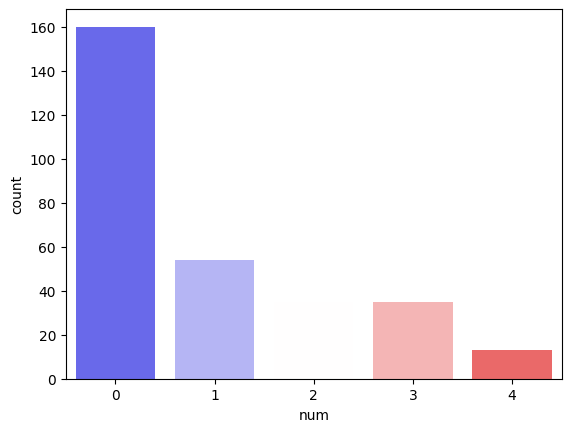

In [ ]:
sns.countplot(x="num", data=Cleveland_data, palette="bwr")
plt.show()

<ipython-input-26-59e19d49575b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Cleveland_data['num'],rug=True)


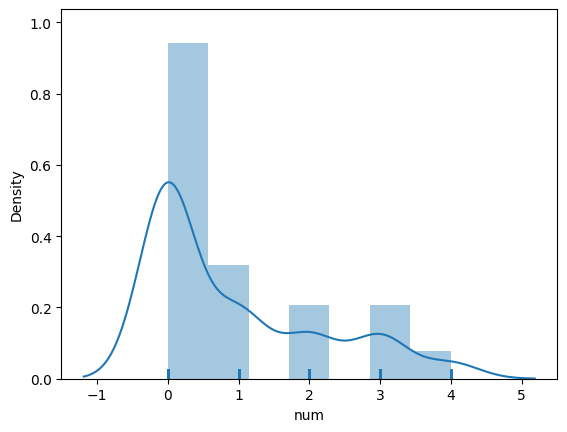

In [ ]:
sns.distplot(Cleveland_data['num'],rug=True)
plt.show()

In [ ]:
countNoPresent = len(Cleveland_data[Cleveland_data.num == 0])
countDisease_class_1 = len(Cleveland_data[Cleveland_data.num == 1])
countDisease_class_2 = len(Cleveland_data[Cleveland_data.num == 2])
countDisease_class_3 = len(Cleveland_data[Cleveland_data.num == 3])
countDisease_class_4 = len(Cleveland_data[Cleveland_data.num == 4])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoPresent / (len(Cleveland_data.num))*100)))
print("Percentage of Patients Have Heart Disease class 1: {:.2f}%".format((countDisease_class_1 / (len(Cleveland_data.num))*100)))
print("Percentage of Patients Have Heart Disease class 2: {:.2f}%".format((countDisease_class_2 / (len(Cleveland_data.num))*100)))
print("Percentage of Patients Have Heart Disease class 3: {:.2f}%".format((countDisease_class_3 / (len(Cleveland_data.num))*100)))
print("Percentage of Patients Have Heart Disease class 4: {:.2f}%".format((countDisease_class_4 / (len(Cleveland_data.num))*100)))

Percentage of Patients Haven't Heart Disease: 53.87%
Percentage of Patients Have Heart Disease class 1: 18.18%
Percentage of Patients Have Heart Disease class 2: 11.78%
Percentage of Patients Have Heart Disease class 3: 11.78%
Percentage of Patients Have Heart Disease class 4: 4.38%


<ipython-input-28-ac017d79ec6e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=Cleveland_data, palette="mako_r")


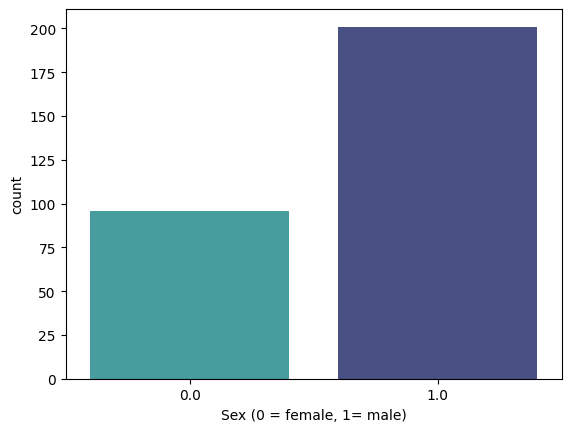

In [ ]:
sns.countplot(x='sex', data=Cleveland_data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
countFemale = len(Cleveland_data[Cleveland_data.sex == 0])
countMale = len(Cleveland_data[Cleveland_data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(Cleveland_data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(Cleveland_data.sex))*100)))

Percentage of Female Patients: 32.32%
Percentage of Male Patients: 67.68%


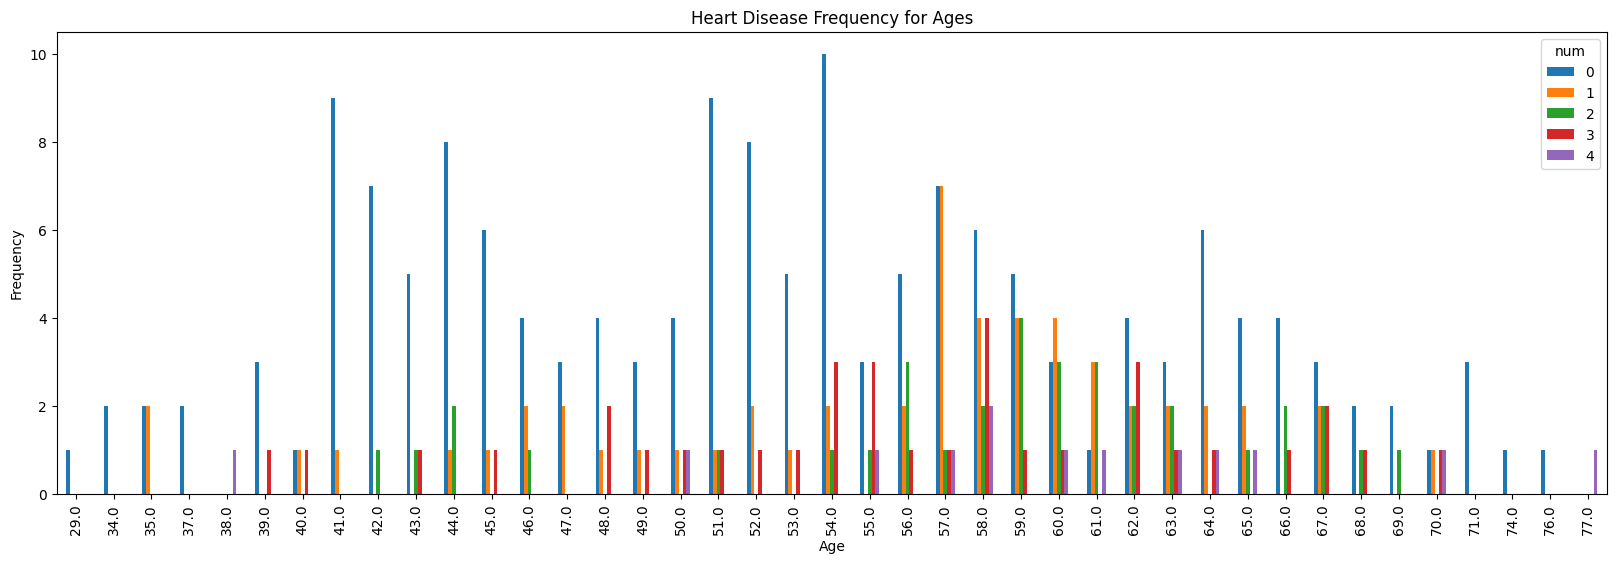

In [ ]:
pd.crosstab(Cleveland_data.age,Cleveland_data.num).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

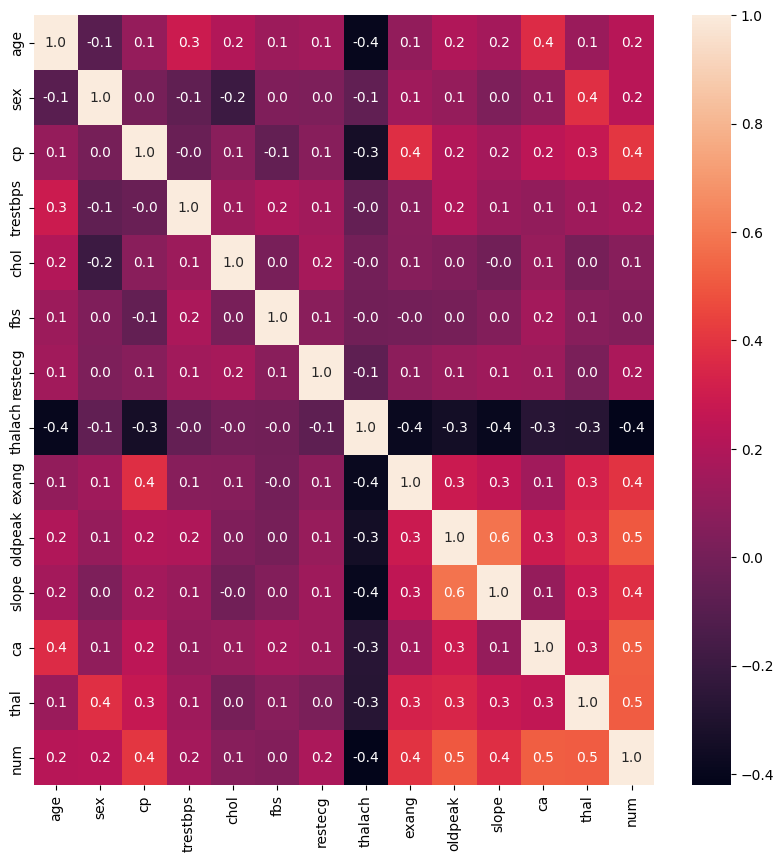

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(Cleveland_data.corr(),annot=True,fmt='.1f')
plt.show()



From the corelation plot we see that **ca, thal, oldpeak, exang, cp(chest pain)**, and **slope** are highly corelated with the num.


### Plotting distribution of same disease

<ipython-input-33-595037a36611>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Cleveland_data['thal'],rug=True)


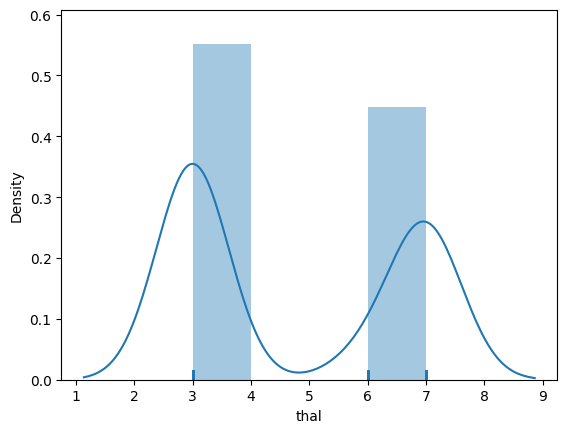

In [ ]:
sns.distplot(Cleveland_data['thal'],rug=True)
plt.show()

<ipython-input-34-9c851b6ea05c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Cleveland_data['ca'],rug=True)


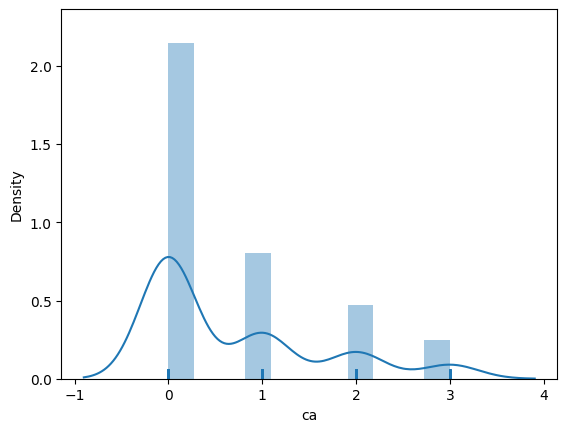

In [ ]:
sns.distplot(Cleveland_data['ca'],rug=True)
plt.show()

# Data prepocessing
Preparing dataset and applying machine learning algorithms to train the model.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
to_scale=['age','trestbps','chol','thalach','oldpeak']
Cleveland_data[to_scale]=sc.fit_transform(Cleveland_data[to_scale])

In [ ]:
Cleveland_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,1.0,1.0,0.750380,-0.276443,1.0,2.0,0.017494,0.0,1.068965,3.0,0.0,6.0,0
1,1.378929,1.0,4.0,1.596266,0.744555,0.0,2.0,-1.816334,1.0,0.381773,2.0,3.0,3.0,2
2,1.378929,1.0,4.0,-0.659431,-0.353500,0.0,2.0,-0.899420,1.0,1.326662,2.0,2.0,7.0,1
3,-1.941680,1.0,3.0,-0.095506,0.051047,0.0,0.0,1.633010,0.0,2.099753,3.0,0.0,3.0,0
4,-1.498933,0.0,2.0,-0.095506,-0.835103,0.0,2.0,0.978071,0.0,0.295874,1.0,0.0,3.0,0


In [ ]:
# @title trestbps

from matplotlib import pyplot as plt
Cleveland_data['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'Cleveland_data' is not defined

In [ ]:
# Define features and Targets: Convert into numpy
X = Cleveland_dataset.drop(columns=['num']).values  # Features
y = Cleveland_dataset['num'].values  # Target


Spliting the 80% of the dataset into train_data and 20% of the dataset into test_data

In [ ]:
# Creating dataset split for prediction
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2,random_state= 42)

# Checking split
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (242, 28)
X_test: (61, 28)
y_train: (242,)
y_test: (61,)


### Since this is a classification problem, algorithms like Random Forest, Logistic Regression, Naïve Bayes (Gaussian Naïve Bayes), SVM are the likely choices for this model.

# We will use logistic regression (classification) algorithm.
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.

#Logistic regression.
The meaning of the term regression is very simple: any process that attempts to find relationships between variables is called regression. Logistic regression is regression because it finds relationships between variables. It is logistic because it uses logistic function as a link function.

In [ ]:
# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)

In [ ]:
print('LogisticRegression_accuracy:\t',lr_ac)

LogisticRegression_accuracy:	 0.5245901639344263


#### **Accuracy**: The overall accuracy of the model is 0.52, which means that approximately 52% of the predictions made by the model were correct.

In [ ]:
# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.23      0.25      0.24        12
           2       0.00      0.00      0.00         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.22      0.27      0.24        61
weighted avg       0.42      0.52      0.47        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'LogisticRegression_cm'}>

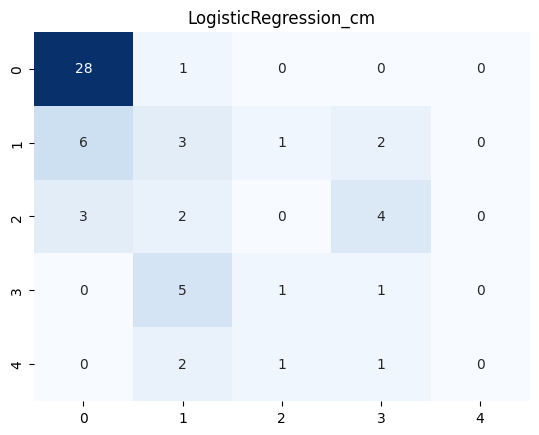

In [ ]:
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [ ]:
# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Perform cross-validation
cv_scores = cross_val_score(lr_c, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

Cross-validation scores: [0.57142857 0.6122449  0.5625     0.60416667 0.54166667]
Mean CV score: 0.5784013605442176
Standard deviation of CV scores: 0.026306450972442382


## Comparaison with other method

In [ ]:
#SVM classifier
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,y_train)
svc_pred=svc_c.predict(X_test)
sv_cm=confusion_matrix(y_test,svc_pred)
sv_ac=accuracy_score(y_test, svc_pred)

#Bayes
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_cm=confusion_matrix(y_test,bayes_pred)
bayes_ac=accuracy_score(bayes_pred,y_test)

#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)

In [ ]:
print('SVM_regressor_accuracy:\t\t',svr_ac)
print('RandomForest_accuracy:\t\t',rdf_ac)
print('DecisionTree_accuracy:\t\t',dtree_ac)
print('KNN_accuracy:\t\t\t',knn_ac)
print('SVM_classifier_accuracy:\t',sv_ac)
print('Bayes_accuracy:\t\t\t',bayes_ac)

SVM_regressor_accuracy:		 0.47540983606557374
RandomForest_accuracy:		 0.5245901639344263
DecisionTree_accuracy:		 0.5573770491803278
KNN_accuracy:			 0.4426229508196721
SVM_classifier_accuracy:	 0.4918032786885246
Bayes_accuracy:			 0.3114754098360656


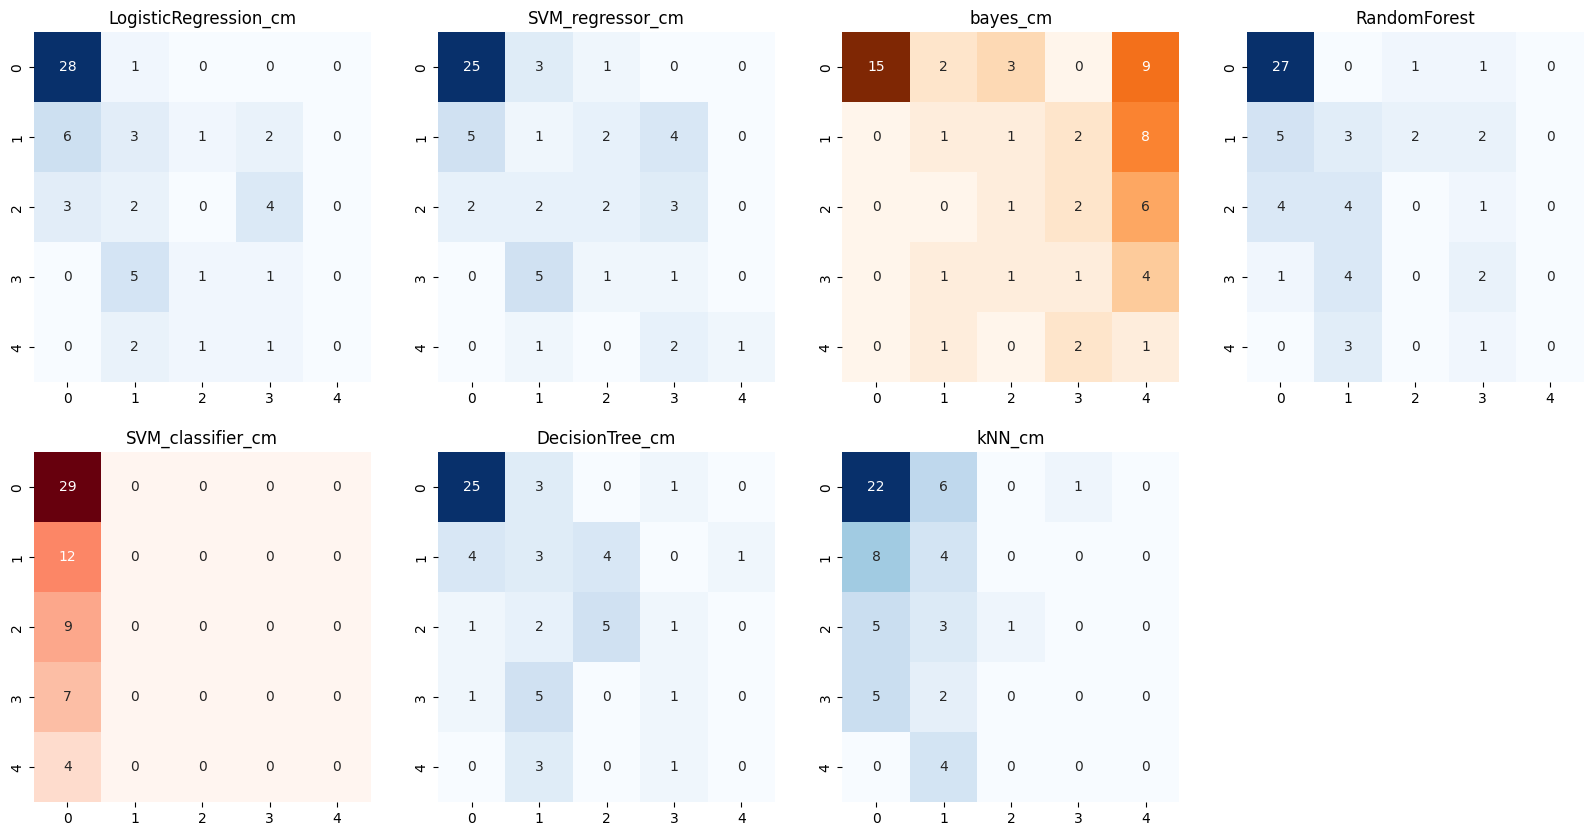

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,2)
plt.title("SVM_regressor_cm")
sns.heatmap(sv_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,3)
plt.title("bayes_cm")
sns.heatmap(bayes_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
plt.subplot(2,4,4)
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,5)
plt.title("SVM_classifier_cm")
sns.heatmap(svr_cm,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.subplot(2,4,6)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,7)
plt.title("kNN_cm")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

Text(0.5, 1.0, 'Model Accuracy')

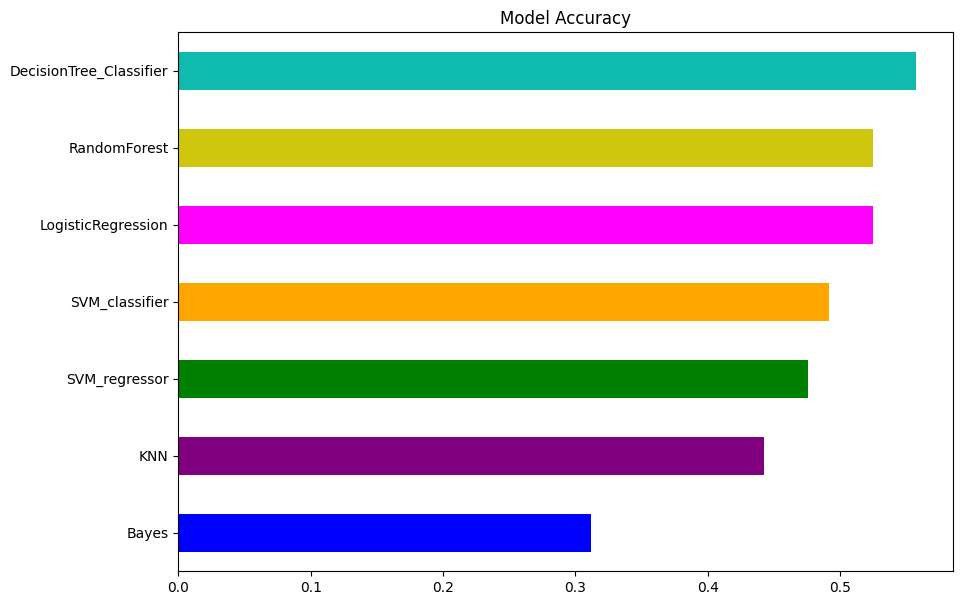

In [ ]:
colors = ["blue","purple", "green", "orange", "magenta", "#CFC60E", "#0FBBAE"]
model_accuracy = pd.Series(data=[lr_ac, sv_ac, bayes_ac, svr_ac, rdf_ac, dtree_ac, knn_ac],
                           index=['LogisticRegression', 'SVM_classifier', 'Bayes', 'SVM_regressor',
                                  'RandomForest', 'DecisionTree_Classifier', 'KNN'])
fig = plt.figure(figsize=(10, 7))
model_accuracy.sort_values().plot.barh(color=colors)
plt.title('Model Accuracy')
